<a href="https://colab.research.google.com/github/pab10dm/pab10dm/blob/main/RpenduloLinealyNOLinealcorto_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         [,1]
[1,] 0.000000
[2,] 0.000000
[3,] 3.141593
[4,] 0.000000


0
0
0
0


     [,1]       [,2]   [,3] [,4]
[1,]    0  1.0000000   0.00    0
[2,]    0 -0.2000000  -1.96    0
[3,]    0  0.0000000   0.00    1
[4,]    0 -0.3333333 -19.60    0


0.000000
2.000000
0.000000
3.333333


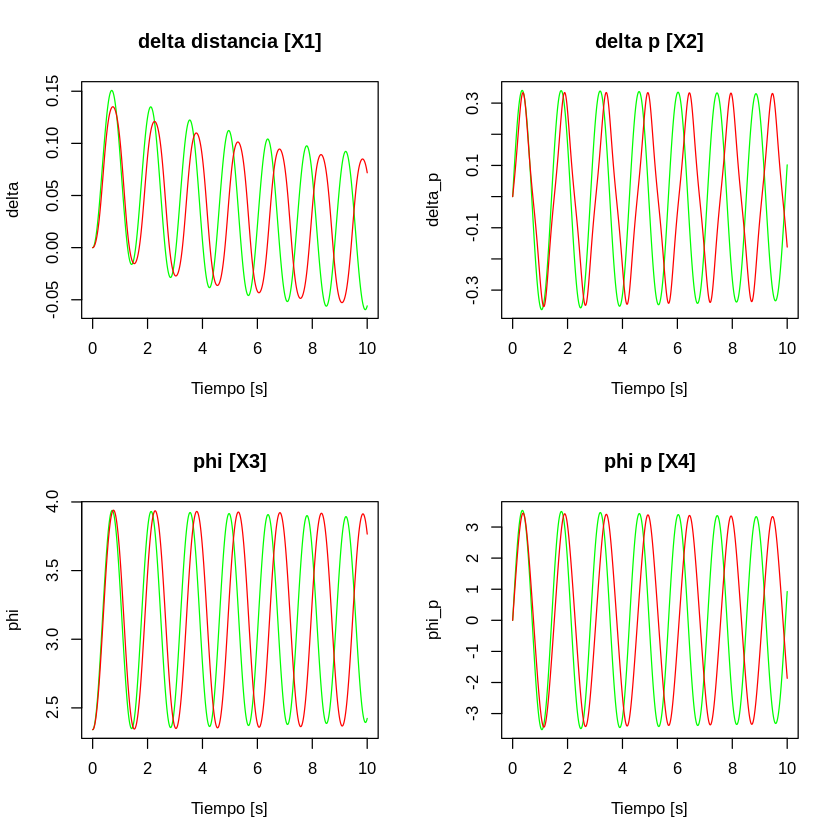

In [1]:
#############################################
#############################################
#https://colab.research.google.com/?authuser=1#create=true&language=r
#La linea superior crea el Notebook, el authuser=1 indica el usuario del Chrome, en mi caso, 0 es gmail y 1 es UNC.edu.ar
X <- numeric(4)
dim(X) <- c(4,1)
ii=0;t_etapa=1e-3
tF=1e1;
Ts=t_etapa;
At=Ts;
Kmax=(tF/At); #fix() No es necesario en Colab
########################################
pi=3.141593 
X0      <-c(0,0,pi,0)
dim(X0) <- c(4,1)
print(X0)
X1      <-c(0,0,0,0)
dim(X1) <- c(4,1)
X1
########################################
m=.1;F=0.1; long=0.6;g=9.8;M=.5;dlt_t=0.0001;
########################################
TL=5.; #tiempo de simulacion
u=0.;
#% x1(1)=X(1);% delta
x1      <- numeric(tF/t_etapa)
dim(x1) <- c(tF/t_etapa,1)
x2      <- numeric(tF/t_etapa) #delta_p
dim(x2) <- c(tF/t_etapa,1)
##################################################################
x3      <- numeric(tF/t_etapa)#phi
dim(x3) <- c(tF/t_etapa,1)
x4      <- numeric(tF/t_etapa)#phi_p
dim(x4) <- c(tF/t_etapa,1)
##################################################################
acc      <- numeric(tF/t_etapa)
dim(acc) <- c(tF/t_etapa,1)
###################################################################
A    <-c(0,1,0,0,0,-(F/M),-((g*m)/(M)),0,0,0,0,1,0,-((F)/(M*long)),-(g*(M+m))/(M*long),0);
# Mat_A=[0 1 0 0;0 -Fricc/M -m*g/M 0; 0 0 0 1; 0 -Fricc/(long*M) -g*(m+M)/(long*M) 0]
dim(A) <- c(4,4) #print(A)
A<-t(A)
print(A)
# Mat_B=[0; 1/M; 0; 1/(long*M)]
B         <- c(0,1/M,0,(1/(M*long)))
dim(B)    <- c(4,1)#genero matriz 4x1 filaXcolumna
B
##################################################################
p          <- numeric(tF/t_etapa)
dim(p)     <- c(tF/t_etapa,1)
p_p        <- numeric(tF/t_etapa)
dim(p_p)   <- c(tF/t_etapa,1)
alfa       <- numeric(tF/t_etapa)
dim(alfa)  <- c(tF/t_etapa,1)
omega      <- numeric(tF/t_etapa)
dim(omega) <- c(tF/t_etapa,1)
tita_pp=0.
X[3]=pi-.8
p[1]=0.
p_p[1]=0.
alfa[1]=X[3]
omega[1]=0.
##
for(i in 0:(tF/At)) {
    ii<-ii+1
    x1[ii]<-X[1] # X1 delta
    x2[ii]<-X[2] # X2 delta_p
    x3[ii]<-X[3] # X3 phi 
    x4[ii]<-X[4] # X4 phi_p
#   X=modrlc(t_etapa, X, u);
#y %*% z A %*% X+B %*% u
    xp <-A%*% (X-X0)+B%*% u
    X  <-X+xp*At
    acc[ii]<-u
    # Cálculo para ver si se corresponde con el No Lineal
    # p_pp=(1/(M+m))*(u(i)-m*long*tita_pp*cos(alfa(i))   +m*long*omega(i)^2*sin(alfa(i))-Fricc*p_p(i));
    p_pp        <-(u  - m*long*tita_pp %*%cos(alfa[ii]) + m*long%*%(omega[ii]^2)*sin(alfa[ii]) - F%*%p_p[ii])/(M+m)
    # tita_pp= (1/long)*(g*sin(alfa(i))-   p_pp*cos(alfa(i)));
    tita_pp     <- (g*sin(alfa[ii]) -p_pp*cos(alfa[ii]))/long
    p_p[ii+1]   <-  p_p[ii]  +At%*%p_pp
    p[ii+1]     <-  p[ii]    + At%*%p_p[ii]
    omega[ii+1] <-  omega[ii]+At%*%tita_pp
    alfa[ii+1]  <-  alfa[ii] +At%*%omega[ii]
#end
}
t1<-seq(0,tF,At)  #seq(from, to, by= )
t2<-seq(0,tF+At,At)  #seq(from, to, by= )
#############################################
par(mfrow=c(2,2))
#plot(t1,x1,     main="delta distancia [X1]", col = "red", lwd = 1,xlab="Tiempo [s]", ylab="delta")
#plot(xy.coords(t1, x1), type = "l",    main="delta distancia [X1]", col = "red", lwd = 1,xlab="Tiempo [s]", ylab="delta")
plot(xy.coords(t1, x1), type = "s",    main="delta distancia [X1]", col = "green", lwd = 1,xlab="Tiempo [s]", ylab="delta")
lines(t2,p,     main="delta distancia [X1]", col = "red", lwd = 1,xlab="Tiempo [s]", ylab="delta")
#plot.xy(xy.coords(x, y), type = type, ...) :
plot(xy.coords(t1, x2), type = "s",     main="delta p [X2]", col = "green", lwd = 1,xlab="Tiempo [s]", ylab="delta_p")
lines(t2,p_p,     main="delta p [X2]", col = "red", lwd = 1,xlab="Tiempo [s]", ylab="delta_p")
plot(xy.coords(t1, x3), type = "s",     main="phi [X3]", col = "green", lwd = 1,xlab="Tiempo [s]", ylab="phi")
lines(t2,alfa,     main="phi [X3]", col = "red", lwd = 1,xlab="Tiempo [s]", ylab="phi")
plot(xy.coords(t1, x4), type = "s",     main="phi p [X4]", col = "green", lwd = 1,xlab="Tiempo [s]", ylab="phi_p")
lines(t2,omega,     main="phi p [X4]", col = "red", lwd = 1,xlab="Tiempo [s]", ylab="phi_p")
#############################################